In [1]:
import numpy as np
import scanpy as sc
import anndata
import scvi
from scib_metrics.benchmark import Benchmarker
import torch
from functions import *
import scib_metrics
%matplotlib inline

/local/data/scvi-tools/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/local/data/scvi-tools/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/local/data/anaconda3/envs/BT/lib/python3.11/site-packages/numba/np/ufunc/dufunc.py:84: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  dispatcher = jit(_target='npyufunc',
/local/data/anaconda3/envs/BT/lib/python3.11/site-pac

In [2]:
adata = sc.read(
    "data/human_pancreas_norm_complexBatch.h5ad"
)

In [10]:
sc.pp.highly_variable_genes(adata, n_top_genes=4000, flavor="cell_ranger", batch_key="tech")
sc.tl.pca(adata, n_comps=30, use_highly_variable=True)
adata = adata[:, adata.var.highly_variable].copy()
adata.obsm["Unintegrated"] = adata.obsm["X_pca"]
scanoramaPredict(adata,batch_label="tech")

Found 4000 genes among all datasets
[[0.         0.6761488  0.04780876 0.18791946 0.11055777 0.01494024
  0.04482072 0.03884462 0.25      ]
 [0.         0.         0.10188088 0.06091895 0.01682135 0.00262582
  0.00306984 0.03820375 0.59080963]
 [0.         0.         0.         0.02037618 0.00470219 0.01410658
  0.         0.64890282 0.09561129]
 [0.         0.         0.         0.         0.51044084 0.63913268
  0.34151957 0.01600413 0.02942695]
 [0.         0.         0.         0.         0.         0.34106729
  0.69315545 0.00201072 0.08700696]
 [0.         0.         0.         0.         0.         0.
  0.44589409 0.00610264 0.02330097]
 [0.         0.         0.         0.         0.         0.
  0.         0.03607061 0.23254029]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.52345845]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]
Processing datasets (4, 6)
Processing datasets (0, 1)
Proce

In [11]:
adata.write_h5ad(filename="data/adataHumPan4.h5ad")

In [12]:
adata = anndata.read_h5ad(filename="data/adataImmHum4.h5ad")
adata

AnnData object with n_obs × n_vars = 33506 × 4000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'sample_ID', 'size_factors', 'species', 'study', 'tissue'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'pca'
    obsm: 'Scanorama', 'Unintegrated', 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [5]:
sdnormalAdata, vaeSD = trainModelBenchmark(adata.copy(), "sdnormal", max_epochs=50, batch_key="tech")

INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 50/50: 100%|██████████| 50/50 [01:27<00:00,  1.74s/it, v_num=1, train_loss_step=1.7e+4, train_loss_epoch=1.34e+4] 

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [01:27<00:00,  1.75s/it, v_num=1, train_loss_step=1.7e+4, train_loss_epoch=1.34e+4]


In [6]:
mogAdata, vaeMG = trainModelBenchmark(adata.copy(), "mixofgaus", max_epochs=50, batch_key="tech")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 50/50: 100%|██████████| 50/50 [01:28<00:00,  1.55s/it, v_num=1, train_loss_step=9.66e+3, train_loss_epoch=1.35e+4]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [01:28<00:00,  1.78s/it, v_num=1, train_loss_step=9.66e+3, train_loss_epoch=1.35e+4]


In [7]:
vampAdata, vaeVP = trainModelBenchmark(adata.copy(), "vamp", max_epochs=50, batch_key="tech")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 50/50: 100%|██████████| 50/50 [01:28<00:00,  1.80s/it, v_num=1, train_loss_step=1.59e+4, train_loss_epoch=1.35e+4]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [01:28<00:00,  1.77s/it, v_num=1, train_loss_step=1.59e+4, train_loss_epoch=1.35e+4]


In [8]:
allAdata = adata.copy()
allAdata.obsm["scVISD"] = sdnormalAdata.obsm["scVI"]
allAdata.obsm["scVIMG"] = mogAdata.obsm["scVI"]
allAdata.obsm["scVIVAMP"] = vampAdata.obsm["scVI"]

Embeddings:   0%|          | 0/4 [00:00<?, ?it/s]INFO:root:isolated labels: no more than 4 batches per label
INFO:root:t_cell: 0.5511548146605492


INFO     t_cell consists of a single batch or is too small. Skip.                                                  


Embeddings:  25%|██▌       | 1/4 [01:07<03:23, 67.90s/it]INFO:root:isolated labels: no more than 4 batches per label
INFO:root:t_cell: 0.5145110320299864


INFO     t_cell consists of a single batch or is too small. Skip.                                                  


Embeddings:  50%|█████     | 2/4 [01:24<01:15, 37.59s/it]INFO:root:isolated labels: no more than 4 batches per label
INFO:root:t_cell: 0.49167110212147236


INFO     t_cell consists of a single batch or is too small. Skip.                                                  


Embeddings:  75%|███████▌  | 3/4 [01:37<00:26, 26.66s/it]INFO:root:isolated labels: no more than 4 batches per label
INFO:root:t_cell: 0.47597031854093075


INFO     t_cell consists of a single batch or is too small. Skip.                                                  


Embeddings: 100%|██████████| 4/4 [01:51<00:00, 27.86s/it]


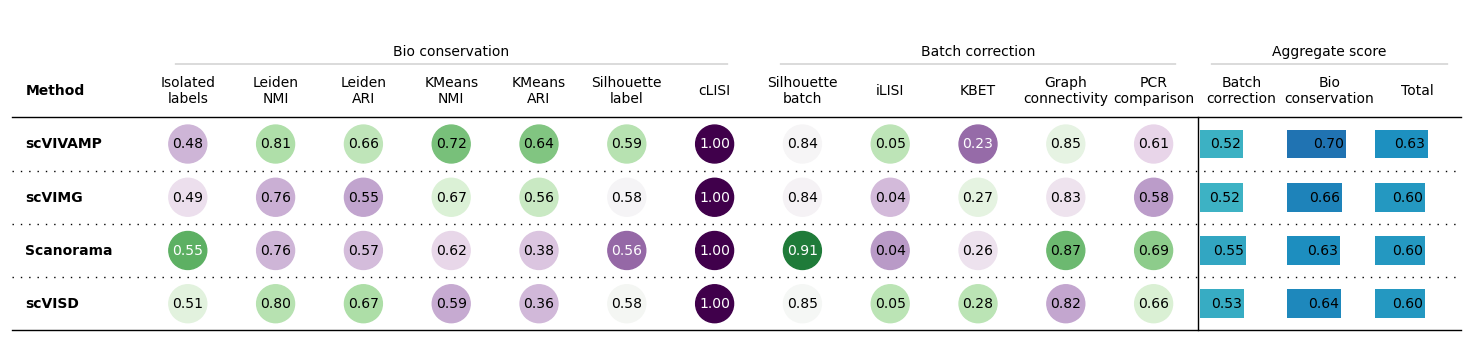

In [9]:
plotBenchmarkResults(allAdata,keys = ["Scanorama","scVISD","scVIMG","scVIVAMP"],label_key="celltype",batch_key="tech")